## Estimator

In [8]:
# EstimatorV2
##################################################################################################################################################
import warnings
warnings.filterwarnings("ignore")
##################################################################################################################################################
from qiskit_ibm_runtime import EstimatorV2 as estimator
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
from qiskit.transpiler import preset_passmanagers
from qiskit.quantum_info import SparsePauliOp
from qiskit import QuantumCircuit

FakeManila = FakeManilaV2()

qc = QuantumCircuit(3)
qc.x([0])
qc.h(1)

observable = SparsePauliOp(["ZZZ"])

transpiler = preset_passmanagers.generate_preset_pass_manager(optimization_level=3, backend=FakeManila)
transpiled_qc = transpiler.run(qc)
transpiled_observable = observable.apply_layout(transpiled_qc.layout)

job = estimator(FakeManila).run([(transpiled_qc, transpiled_observable)])
job.result()[0].data.evs

array(-0.02050781)

In [ ]:
# BackendEstimatorV2
##################################################################################################################################################
import warnings
warnings.filterwarnings("ignore")
##################################################################################################################################################
from qiskit.primitives import BackendEstimatorV2 as estimator
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
from qiskit.transpiler import preset_passmanagers
from qiskit.quantum_info import SparsePauliOp
from qiskit import QuantumCircuit

FakeManila = FakeManilaV2()

qc = QuantumCircuit(3)
qc.x([0])
qc.h(1)

observable = SparsePauliOp(["ZZZ"])

transpiler = preset_passmanagers.generate_preset_pass_manager(optimization_level=1, backend=FakeManila)
transpiled_qc = transpiled.run(qc)
transpiled_observable = observable.apply_layout(transpiled_qc.layout)

job = estimator(backend=FakeManila).run([(transpiled_qc, transpiled_observable)])
job.result()[0].data.evs

array(-0.00097656)

## Sampler

In [13]:
# SamplerV2
# BackendEstimatorV2
##################################################################################################################################################
import warnings
warnings.filterwarnings("ignore")
##################################################################################################################################################
from qiskit_ibm_runtime import SamplerV2 as sampler
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
from qiskit.transpiler import preset_passmanagers
from qiskit import QuantumCircuit

FakeManila = FakeManilaV2()

qc = QuantumCircuit(3)
qc.x([0])
qc.h(1)
qc.measure_all()

transpiler = preset_passmanagers.generate_preset_pass_manager(optimization_level=1, backend=FakeManila)
transpiled_qc = transpiler.run(qc)

job = sampler(FakeManila).run([(transpiled_qc)])
job.result()[0].data.meas.get_counts()

{'001': 523, '011': 501}

In [22]:
# SamplerV2
# BackendEstimatorV2
##################################################################################################################################################
import warnings
warnings.filterwarnings("ignore")
##################################################################################################################################################
from qiskit.primitives import BackendSamplerV2 as sampler
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
from qiskit.transpiler import preset_passmanagers
from qiskit import QuantumCircuit

FakeManila = FakeManilaV2()

qc = QuantumCircuit(3)
qc.x([0])
qc.h(1)
qc.measure_all()

transpiler = preset_passmanagers.generate_preset_pass_manager(optimization_level=1, backend=FakeManila)
transpiled_qc = transpiler.run(qc)

job = sampler(backend=FakeManila).run([(transpiled_qc)])
job.result()[0].data.meas.get_counts()

{'001': 514, '011': 510}

## Medição do qubit na base Z |<q|0>|² ou |<q|1>|²

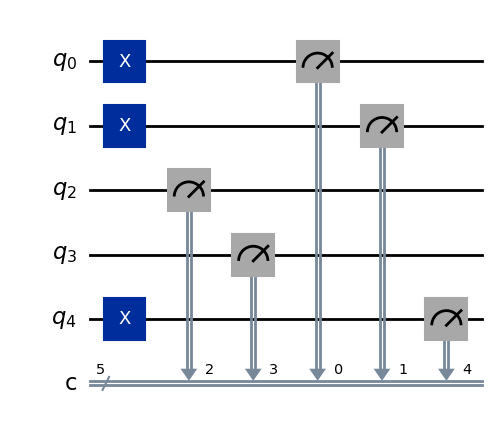

In [26]:
from qiskit import QuantumCircuit
 
qc = QuantumCircuit(5,5)
qc.x(0)
qc.x(1)
qc.x(4)
measure = qc.measure(range(5),range(5)) #  Measures all qubits into the corresponding clbit.
qc.draw('mpl')

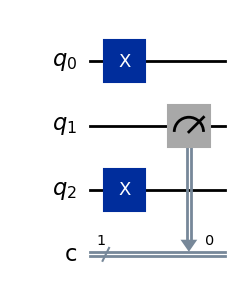

In [33]:
from qiskit import QuantumCircuit
 
qc = QuantumCircuit(3, 1)
qc.x([0, 2])
qc.measure(1, 0)    # Measure qubit 1 into the classical bit 0.
qc.draw('mpl')

In [37]:
circuit = QuantumCircuit(2, 2)
circuit.measure([0,1], [0,1])
circuit.draw()

┌─┐   
q_0: ┤M├───
     └╥┘┌─┐
q_1: ─╫─┤M├
      ║ └╥┘
c: 2/═╩══╩═
      0  1

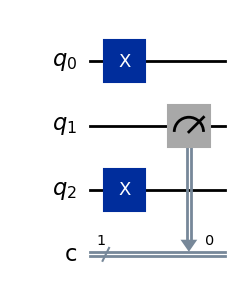

In [38]:
circuit = QuantumCircuit(2, 2)
circuit.measure(0, 0)
circuit.measure(1, 1)
qc.draw('mpl')

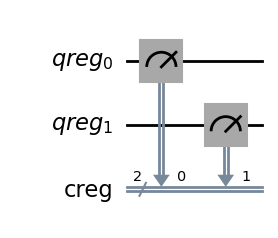

In [43]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
qreg = QuantumRegister(2, "qreg")
creg = ClassicalRegister(2, "creg")
circuit = QuantumCircuit(qreg, creg)
circuit.measure(qreg, creg)
circuit.draw('mpl')

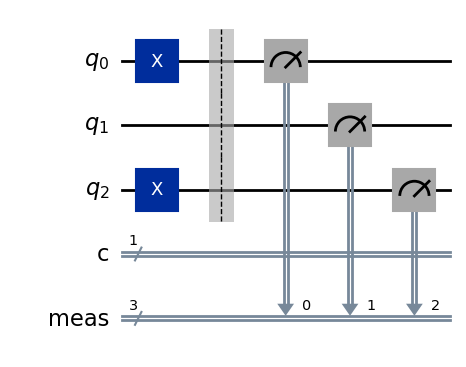

In [41]:
from qiskit import QuantumCircuit
 
qc = QuantumCircuit(3, 1)
qc.x([0, 2])
qc.measure_all() # Measure all qubits.
qc.draw('mpl')

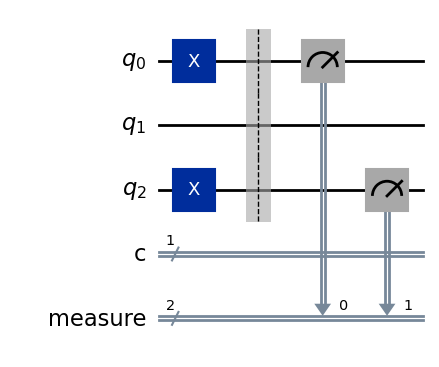

In [42]:
from qiskit import QuantumCircuit
 
qc = QuantumCircuit(3, 1)
qc.x([0, 2])
qc.measure_active() # Measure qubits that are not idle, i.e., qubits 0 and 2.
qc.draw('mpl')